In [1]:
import math
import string
import numpy as np
import matplotlib.pyplot as plt

### Observations

In [2]:
file = open('observations.txt', "r")

for line in file:
    obs = line.strip().split()
    obs = [int(i) for i in obs]
T = len(obs)

### Initial State Distribution

In [3]:
pi = []
file = open('initialStateDistribution.txt', "r")

for line in file:
    l = float(line.strip())
    pi.append(l)
n = len(pi)

### Emission Matrix

In [4]:
b = []
file = open('emissionMatrix.txt', "r")

for line in file:
    l = line.strip().split()
    b.append([float(i) for i in l])

### Transition Matrix

In [5]:
a = []
file = open('transitionMatrix.txt', "r")

for line in file:
    l = line.strip().split()
    a.append([float(i) for i in l])

### Viterbi Algorithm

In [6]:
viterbi = []
vb = []

for i in range(n):
    v = math.log(pi[i]) + math.log(b[i][obs[0]])
    vb.append(v)
viterbi.append(vb)

In [7]:
paths = []
for i in range(1,T):
    temp = []
    tempi = []
    for j in range(n):
        maxv = -float('inf')
        ind = -1
        for k in range(n):
            v = viterbi[i-1][k]+math.log(a[k][j])
            if (v>maxv):
                maxv = v
                ind = k
        temp.append(maxv+math.log(b[j][obs[i]]))
        tempi.append(ind)
    viterbi.append(temp)
    paths.append(tempi)

### Tracing the argmax path

In [8]:
maxpath = []
argmax = np.array(viterbi[-1]).argmax()
maxpath.append(argmax)

In [9]:
for i in range(len(paths)-1,-1,-1):
    maxpath.append(paths[i][argmax])
    argmax = paths[i][argmax]
maxpath.reverse()

### Constructing the answer from the path 

In [10]:
prev = maxpath[0]
ans = [prev]
for i in range(1,len(maxpath)):
    if maxpath[i] != prev:
        ans.append(maxpath[i])
        prev = maxpath[i] 

In [11]:
alphabet = list(string.ascii_lowercase)
alphabet += [" "]

In [12]:
quotation = ''.join(alphabet[i] for i in ans)
quotation

'a house divided against itself canot stand'

### Plot of most likely hidden states vs time 

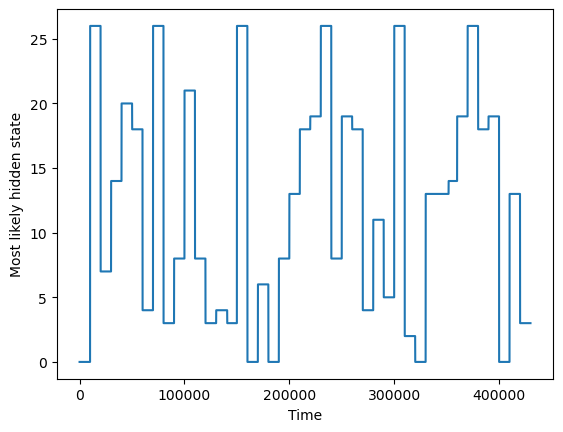

In [13]:
plt.plot(maxpath)
plt.ylabel("Most likely hidden state")
plt.xlabel("Time")
plt.show()